# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nessa etapa vou verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devo excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [ ]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(penguins.isnull().sum())

Valores nulos por coluna:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
# Remover colunas categóricas (ignorando se alguma não existir)
penguins_clean = penguins_clean.drop(columns=['species', 'island', 'sex', 'year'], errors='ignore')

# Visualizar as primeiras linhas para confirmar
penguins_clean.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


# 2 - Visualizarei a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

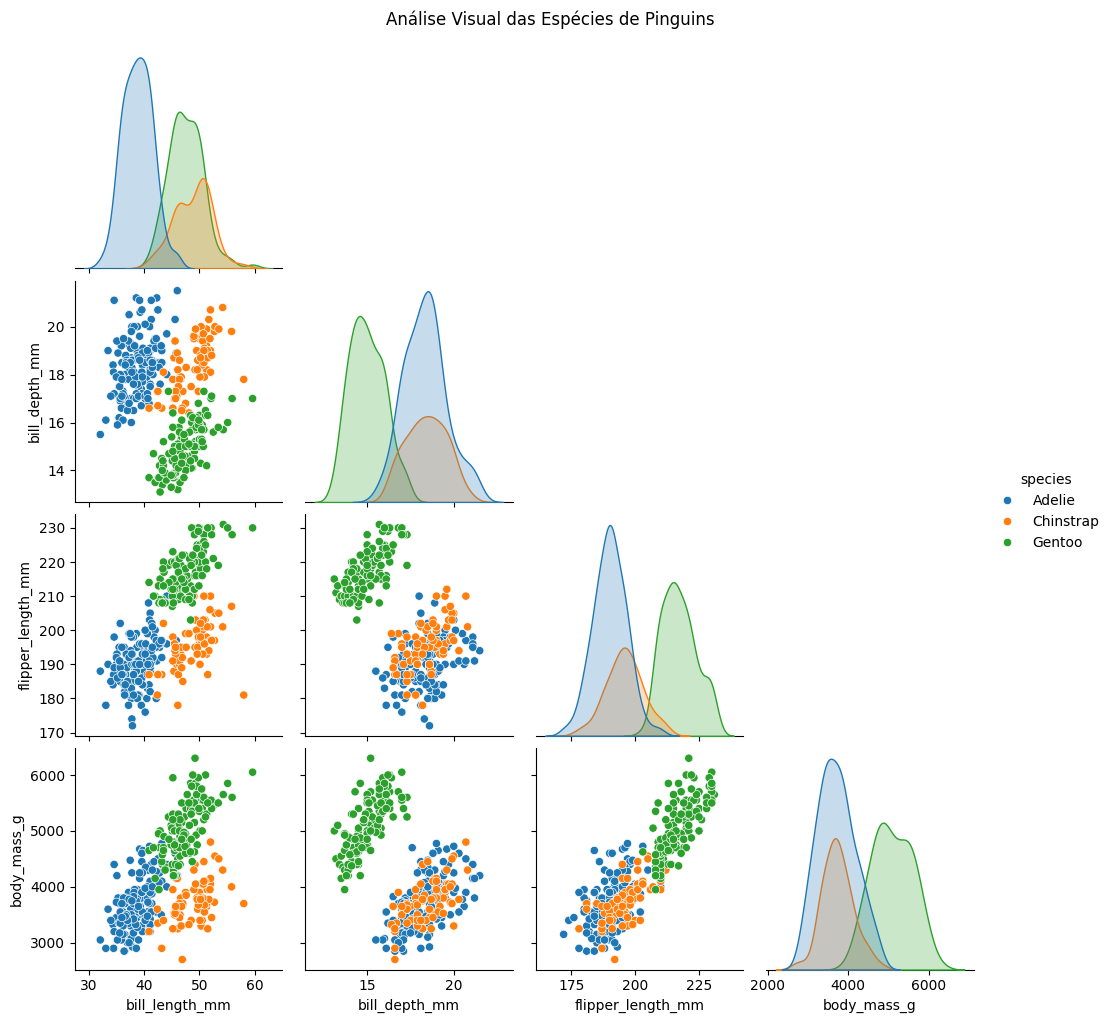

In [ ]:
# Criar nova base limpa apenas para visualização (mantendo species)
penguins_vis = penguins.dropna()

# Pairplot com Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(penguins_vis, hue='species', corner=True)
plt.suptitle('Análise Visual das Espécies de Pinguins', y=1.02)
plt.show()


É possível já identificar possíveis agrupamentos? Se sim, quantos?

Sim, ao visualizar os dados com o gráfico pairplot, já dá pra perceber que existem três grupos principais de pinguins, com base nas medidas físicas como comprimento do bico, profundidade do bico, comprimento da barbatana e massa corporal.

Esses grupos aparecem bem separados em alguns dos gráficos de dispersão, principalmente quando cruzamos bill_length_mm com bill_depth_mm ou flipper_length_mm. Isso indica que o algoritmo de clustering (como o K-means) provavelmente conseguirá identificar esses padrões e formar três clusters distintos.

Esses agrupamentos visuais fazem bastante sentido, já que sabemos que o conjunto de dados tem três espécies diferentes de pinguins — e mesmo sem usar essa informação diretamente, já conseguimos notar diferenças entre elas só pelas medidas físicas.

# 3 - Realizando a padronização dos dados e visualizando os dados.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Aplicar padronização nos dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(penguins_clean)

# Transformar em DataFrame para visualização (opcional)
X_scaled_df = pd.DataFrame(X_scaled, columns=penguins_clean.columns)
X_scaled_df.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


# 4 - Aplicando o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar a coluna de clusters ao DataFrame original
penguins_clean['cluster'] = clusters

# Visualizar os primeiros dados com a nova coluna
penguins_clean.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


# 5 - Construindo pelo 2 matriz de dispersão, indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

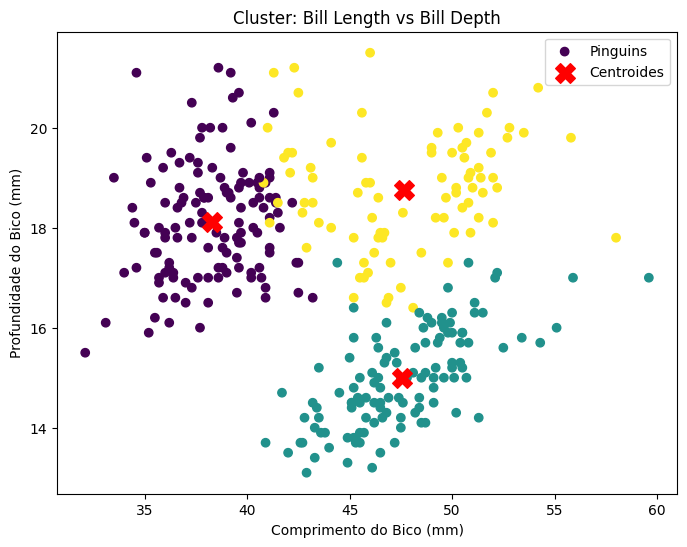

In [ ]:
import matplotlib.pyplot as plt

# Inverter os centroides padronizados para a escala original
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(penguins_clean['bill_length_mm'], penguins_clean['bill_depth_mm'],
            c=penguins_clean['cluster'], cmap='viridis', label='Pinguins')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Profundidade do Bico (mm)')
plt.title('Cluster: Bill Length vs Bill Depth')
plt.legend()
plt.show()


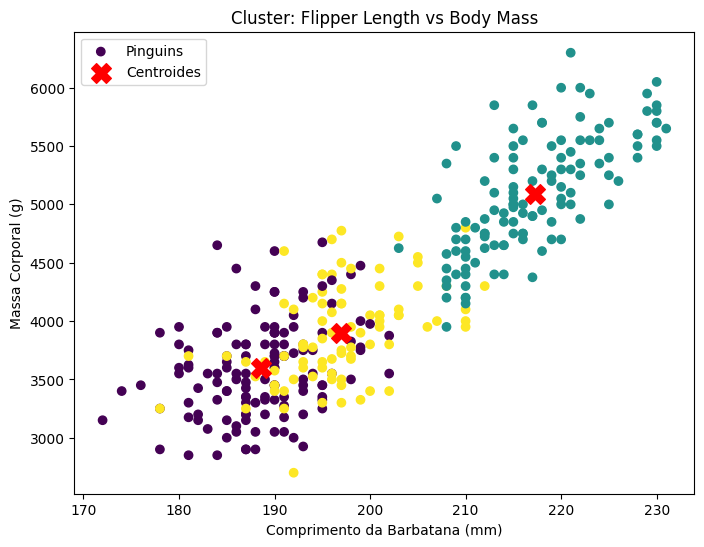

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(penguins_clean['flipper_length_mm'], penguins_clean['body_mass_g'],
            c=penguins_clean['cluster'], cmap='viridis', label='Pinguins')
plt.scatter(centroids_original[:, 2], centroids_original[:, 3],
            c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Comprimento da Barbatana (mm)')
plt.ylabel('Massa Corporal (g)')
plt.title('Cluster: Flipper Length vs Body Mass')
plt.legend()
plt.show()


# 6 - Mais 3 utilidades de aplicações de algoritmos de clusterização:

Entender melhor os clientes
Empresas usam algoritmos de clusterização para dividir seus clientes em grupos parecidos. Por exemplo: clientes que compram com frequência, os que só compram em promoções, ou os que gastam mais. Assim, a empresa pode fazer ofertas mais personalizadas pra cada tipo de cliente.

Organizar grandes quantidades de informações
Em vez de classificar manualmente milhares de textos, notícias ou comentários, o algoritmo pode agrupar automaticamente os conteúdos por similaridade. Isso ajuda muito na hora de analisar dados de redes sociais, sites de notícias ou avaliações de produtos.

Identificar comportamentos fora do comum
Se a maioria dos dados se encaixa bem em grupos, e alguns pontos ficam totalmente fora deles, isso pode ser sinal de algo estranho. Por exemplo, em sistemas bancários, esses pontos fora dos clusters podem indicar fraudes ou transações suspeitas.